In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

In [2]:
task1 = pd.read_csv("X_train_task1.csv")
y_train = pd.read_csv("Y_train_task1.csv")
task1["IsCorrect"] = y_train.IsCorrect
task2 = pd.read_csv("task2_allData.csv")

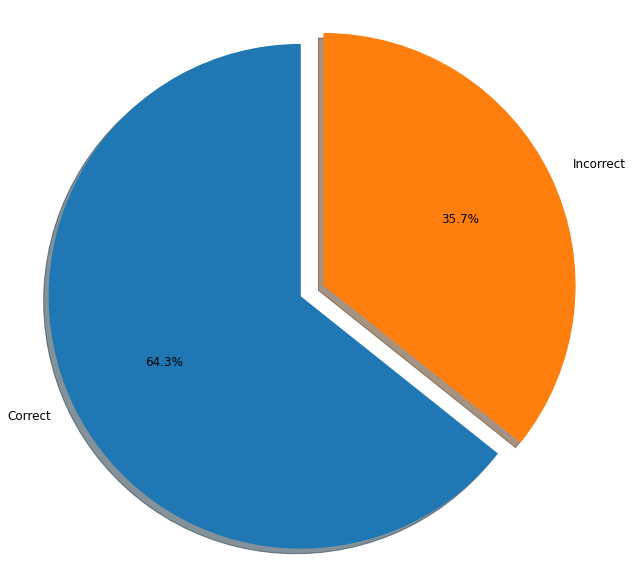

In [115]:
labels = 'Correct', 'Incorrect'
correct = y_train[y_train["IsCorrect"] == 1].shape[0]
inCorrect = y_train[y_train["IsCorrect"] == 0].shape[0]
sizes = [correct, inCorrect]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
fig1.set_size_inches(18.5, 10.5)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
fig1.set_facecolor('white')
fig1.set_size_inches(10.5, 10.5)
plt.rc('font', size=16)
plt.show()

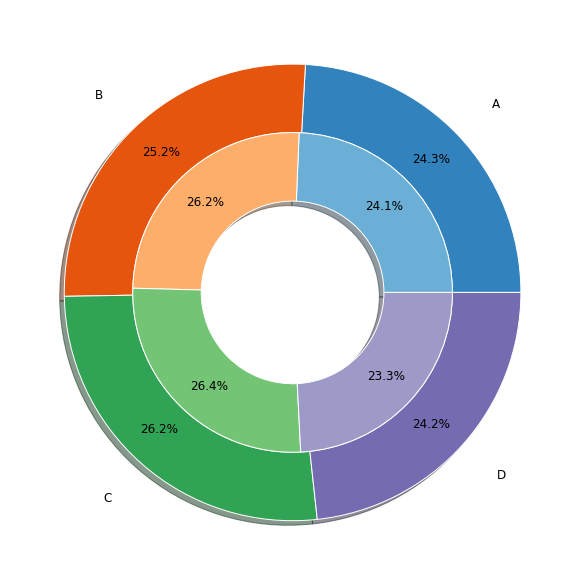

In [17]:
labels = 'A', 'B', 'C', 'D'
fig, ax = plt.subplots()

size = 0.3
vals1 = np.array(
    [
        [task2[task2["AnswerValue"] == 1].shape[0]], 
        [task2[task2["AnswerValue"] == 2].shape[0]],
        [task2[task2["AnswerValue"] == 3].shape[0]],
        [task2[task2["AnswerValue"] == 4].shape[0]]
    ]
)

vals2 = np.array(
    [
        [task2[task2["CorrectAnswer"] == 1].shape[0]], 
        [task2[task2["CorrectAnswer"] == 2].shape[0]],
        [task2[task2["CorrectAnswer"] == 3].shape[0]],
        [task2[task2["CorrectAnswer"] == 4].shape[0]]
    ]
)

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap([1, 6, 9, 13])

ax.pie(vals1.sum(axis=1), labels=labels, radius=1, colors=outer_colors, pctdistance=.55, labeldistance=1.2,
       autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'), shadow=True)

ax.pie(vals2.flatten(), radius=1-size, colors=inner_colors, pctdistance=1.2, labeldistance=1.2,
       autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'), shadow=True)

fig.set_facecolor('white')
fig.set_size_inches(18.5, 10.5)
plt.rc('font', size=12)
plt.show()

In [3]:
task2["IsCorrect"] = y_train.IsCorrect
task2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15867850 entries, 0 to 15867849
Data columns (total 32 columns):
 #   Column                Dtype  
---  ------                -----  
 0   QuestionId            int64  
 1   AnswerId              float64
 2   UserId                int64  
 3   QuizId                int64  
 4   GroupId               int64  
 5   SchemeOfWorkId        float64
 6   CorrectAnswer         int64  
 7   AnswerValue           int64  
 8   CommonAnswer          int64  
 9   Gender                int64  
 10  Age                   int64  
 11  IQLevel               float64
 12  PremiumPupil          float64
 13  Confidence            float64
 14  SchoolShift           int64  
 15  TimeToAnswerQuestion  int64  
 16  TimeToAnswerQuiz      float64
 17  QuestionDifficulty    float64
 18  QuestionMedianTime    float64
 19  QuizMedianTime        float64
 20  YearAnswered          int64  
 21  MonthAnswered         int64  
 22  DayAnswered           int64  
 23  HourA

In [4]:
data = task2[[
    "IsCorrect", "AnswerValue", "CorrectAnswer", 
    "CommonAnswer", "Age", "Gender", "IQLevel",
    "PremiumPupil", "Confidence", "SchoolShift",
    "TimeToAnswerQuestion", "TimeToAnswerQuiz",
    "QuestionDifficulty", "QuestionMedianTime",
    "QuizMedianTime", "QuestionLevel", "QuizLength",
    "#QuestionForStudent", "MathType", "MathDifficulty", "MathStdIQ", "QuestionId"
]]

<AxesSubplot:>

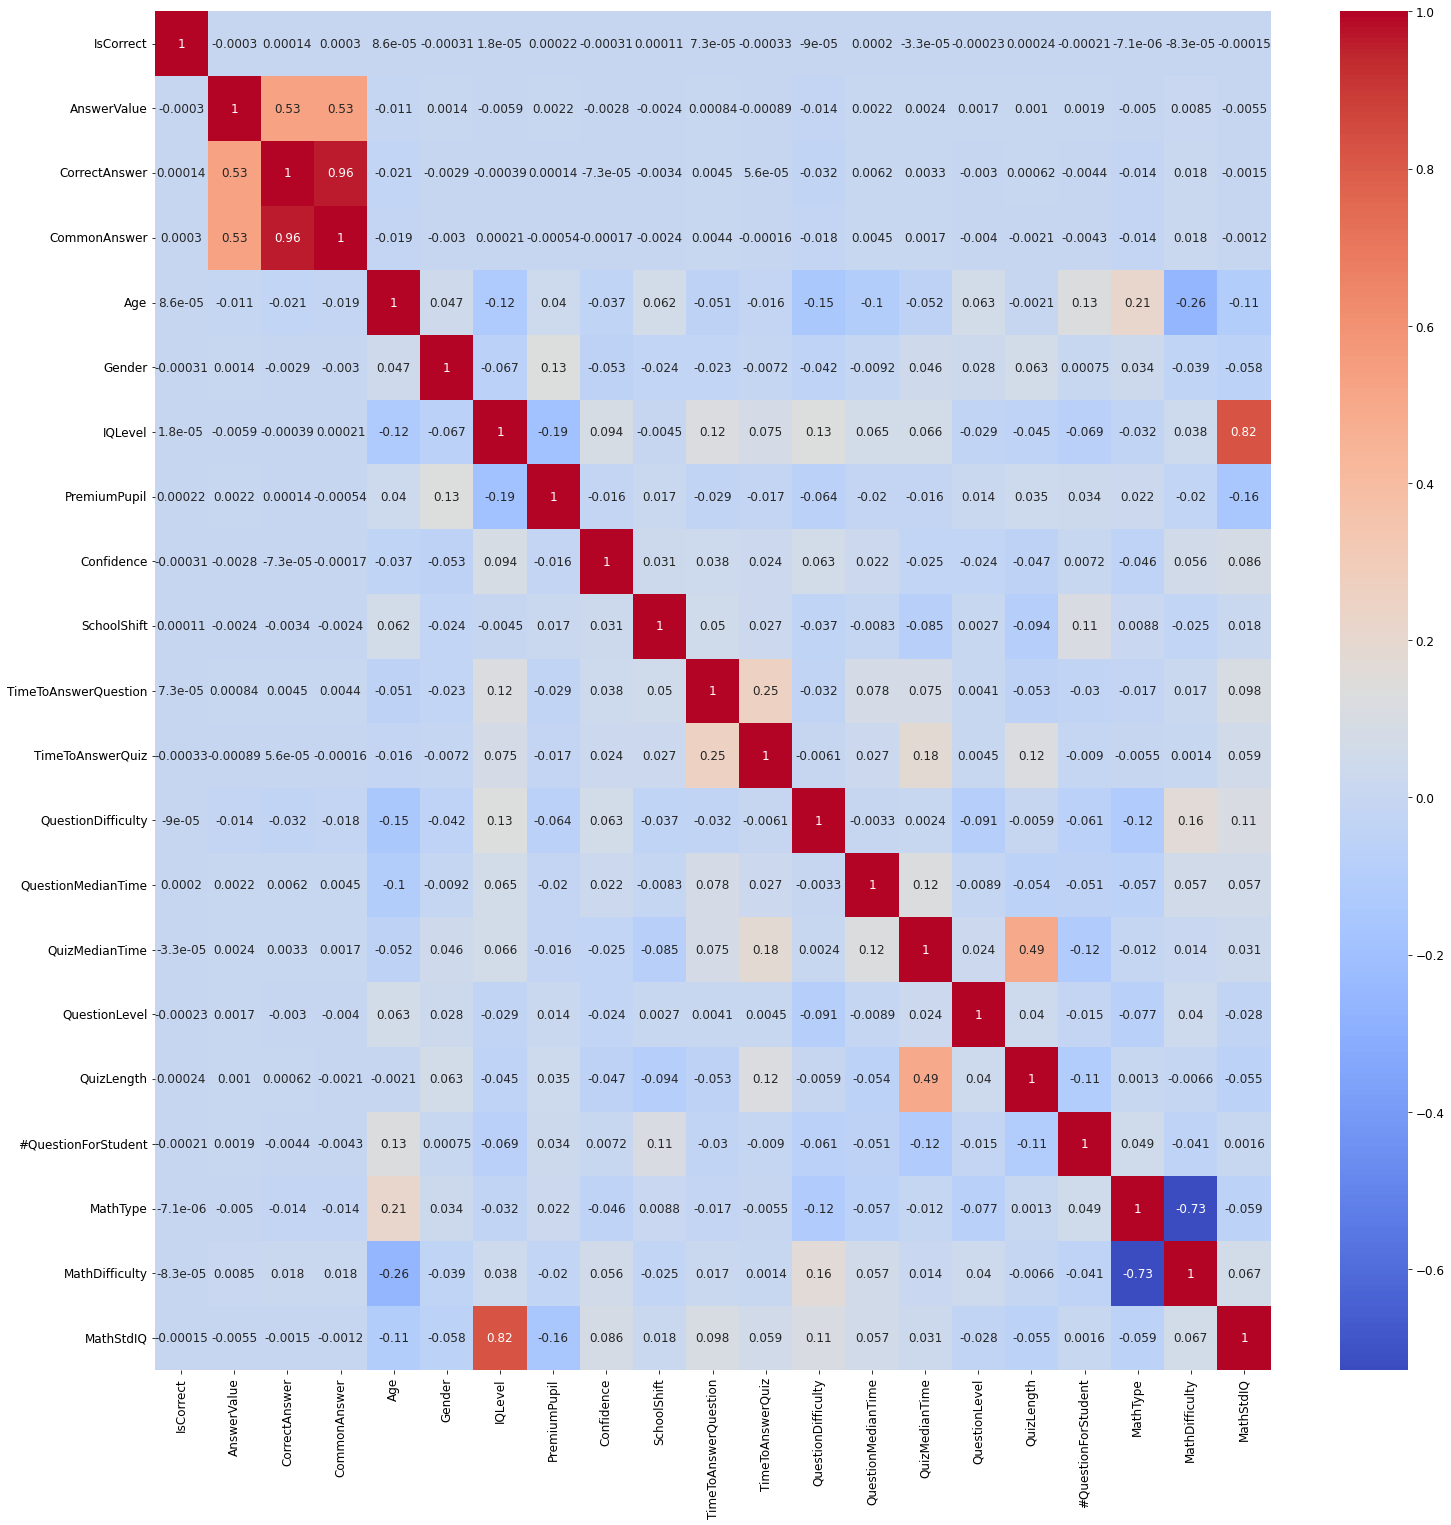

In [99]:
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

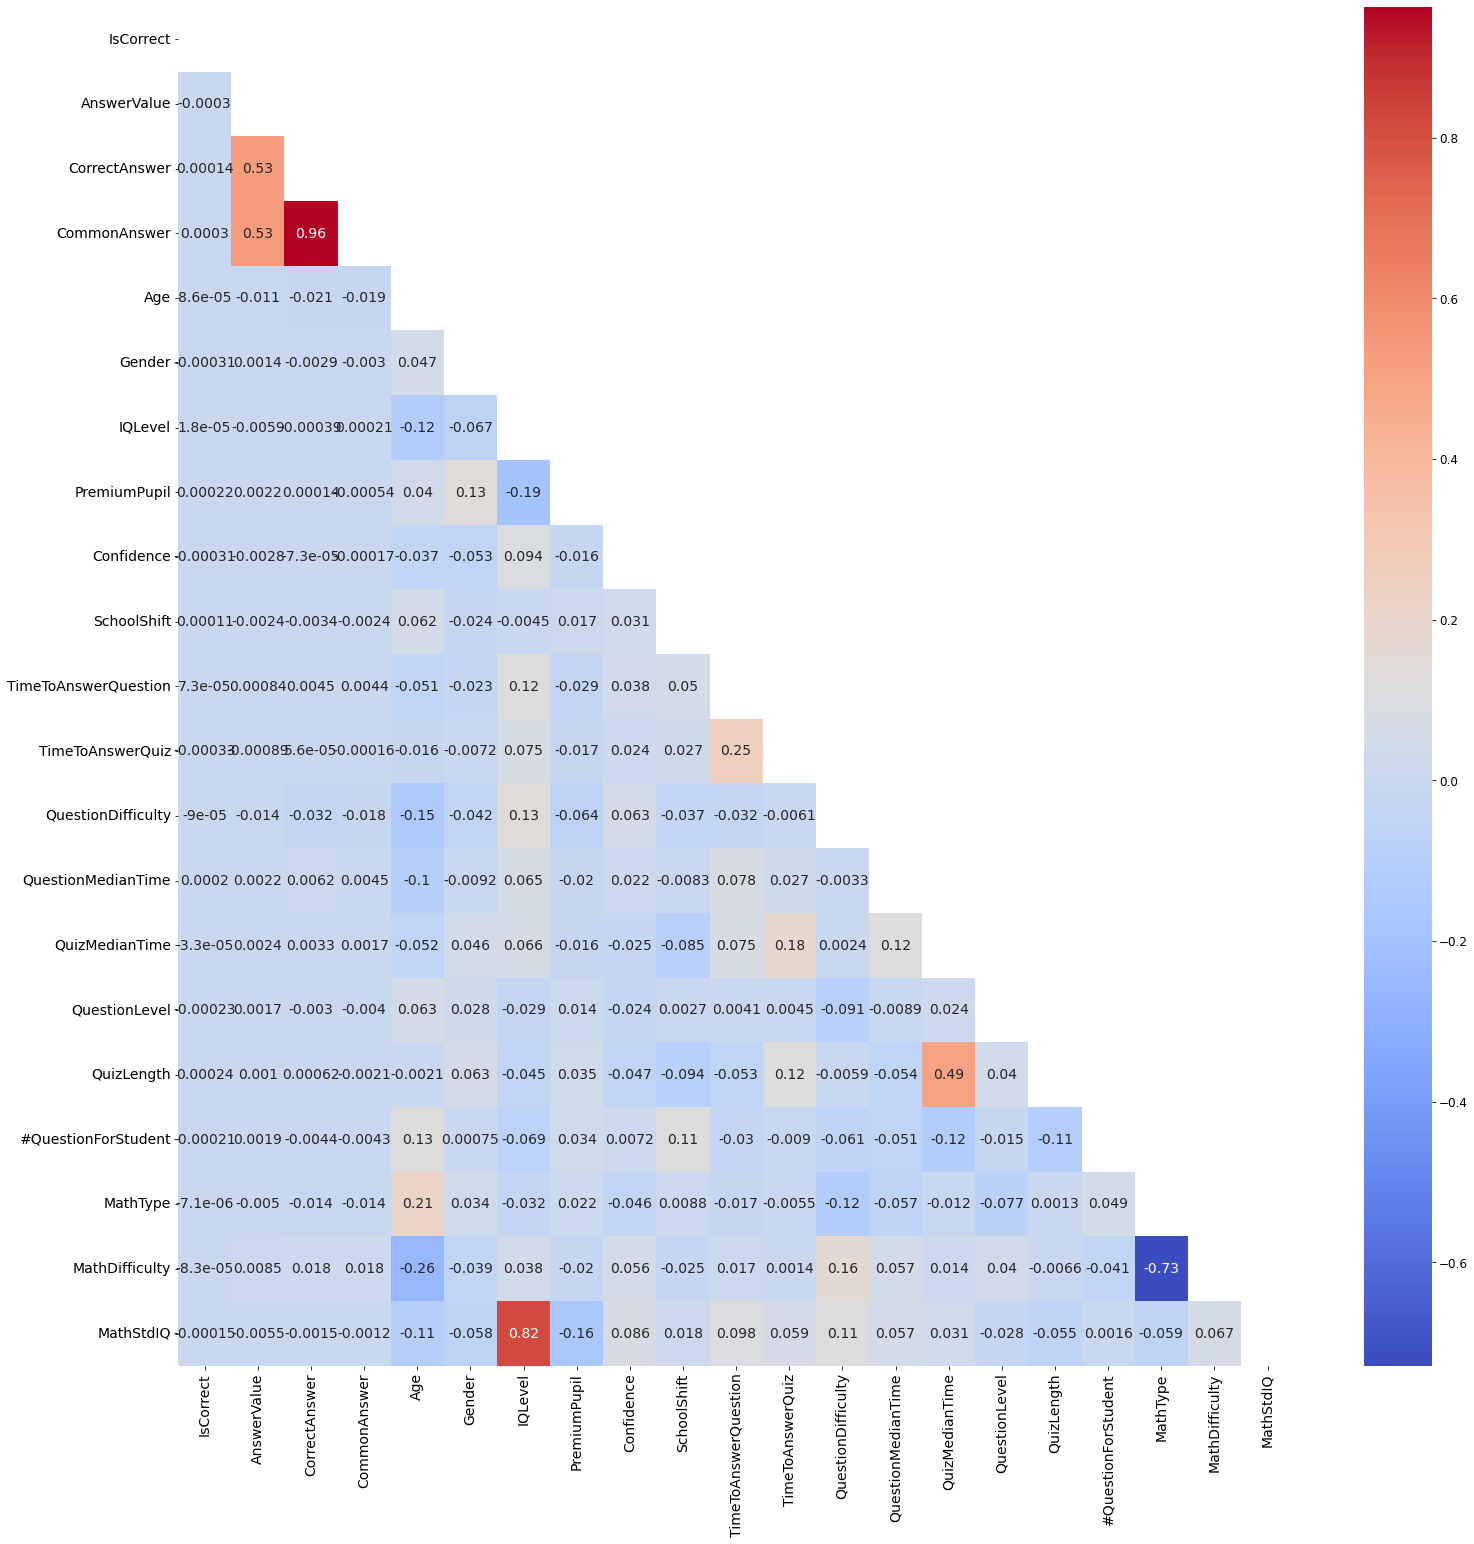

In [103]:
mask = np.zeros_like(data.corr())
tri = np.triu_indices_from(mask)
mask[tri] = True
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 14}, cmap="coolwarm", mask=mask)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<AxesSubplot:xlabel='MathType', ylabel='MathStdIQ'>

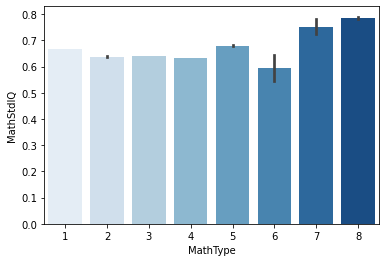

In [59]:
sns.barplot(data=data, x="MathType", y="MathStdIQ", palette="Blues")

<AxesSubplot:xlabel='MathType', ylabel='MathDifficulty'>

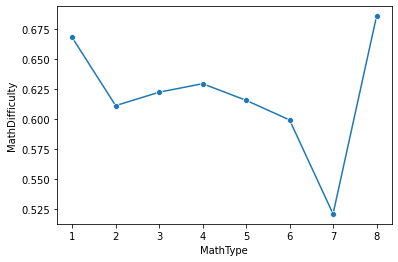

In [27]:
x = data.MathType.unique()
y = data.MathDifficulty.unique()
df = pd.DataFrame(np.swapaxes([x, y], 0, 1), columns =['MathType', 'MathDifficulty'])
sns.lineplot(data=df, x="MathType", y="MathDifficulty", marker='o')

In [ ]:
x = data.QuestionId
y = data.QuestionDifficulty
df = pd.DataFrame(np.swapaxes([x, y], 0, 1), columns =['QuestionId', 'QuestionDifficulty'])
sample = df.sample(n=100)
# sns.scatterplot(data=sample, x="QuestionMedianTime", y="QuestionDifficulty")
g = sns.barplot(data=data, x="QuestionId", y="QuestionDifficulty", palette="Blues")
g.set_xscale("log")

<AxesSubplot:xlabel='IQLevel', ylabel='Age'>

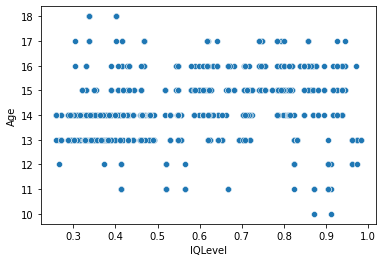

In [41]:
# x = data.Age
# y = data.IQLevel

# plt.bar(x, y, align='center')
# plt.xlabel('Age')
# plt.ylabel('IQLevel')
# plt.show()

sample = data[data["#QuestionForStudent"] > 1000].sample(n=1000)

sns.scatterplot(y="Age", x="IQLevel", data=sample, linestyle='-', marker='o', palette="Blues")

/Users/mohammadabdulah/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


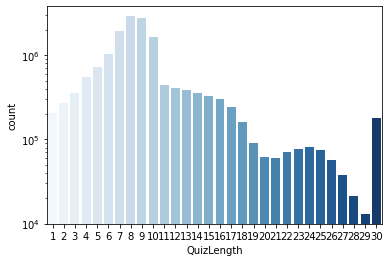

In [22]:
data.QuizLength = data.QuizLength.apply(np.int64)
g = sns.countplot(x ='QuizLength', data = data, palette="Blues")
g.set_yscale("log")
# ax = sns.countplot(x ='QuizLength', data = data, palette="Blues")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# plt.tight_layout()
# plt.show()

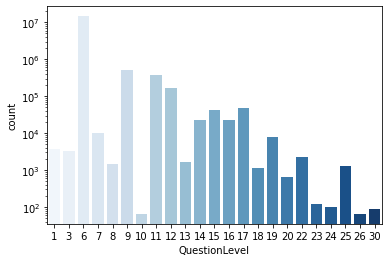

In [21]:
g = sns.countplot(x ='QuestionLevel', data = data, palette="Blues")
g.set_yscale("log")

<AxesSubplot:xlabel='Age', ylabel='count'>

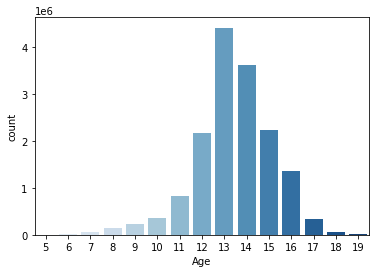

In [50]:
sns.countplot(x ='Age', data = data, palette="Blues")

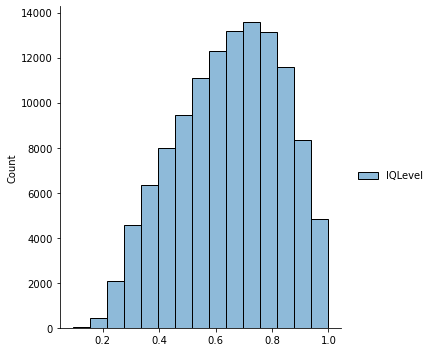

In [42]:
iq = task2[["UserId", "IQLevel"]]
iq = iq.drop_duplicates(subset="UserId")
del iq["UserId"]
sns.displot(iq, kde=False, bins=15, color="Blues")

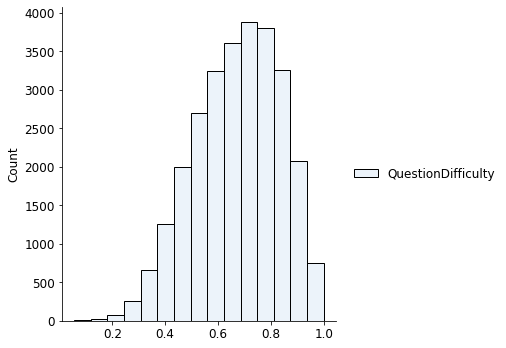

In [89]:
questionDifficulty = task2[["QuestionId", "QuestionDifficulty"]]
questionDifficulty = questionDifficulty.drop_duplicates(subset="QuestionId")
del questionDifficulty["QuestionId"]

# sns.set_palette("Blues")

sns.displot(questionDifficulty, kde=False, bins=15, color="Blues")

<AxesSubplot:xlabel='Gender', ylabel='count'>

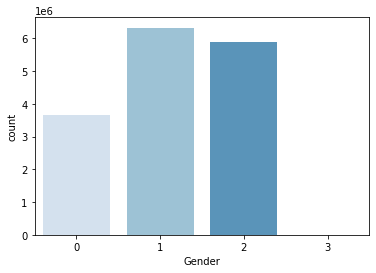

In [51]:
sns.countplot(x ='Gender', data = data, palette="Blues")

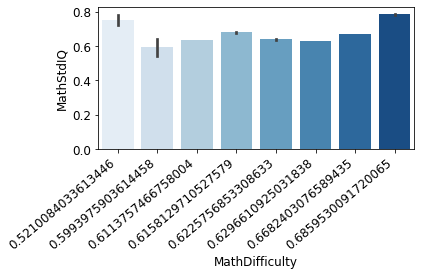

In [90]:
ax = sns.barplot(data=data, x="MathDifficulty", y="MathStdIQ", palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

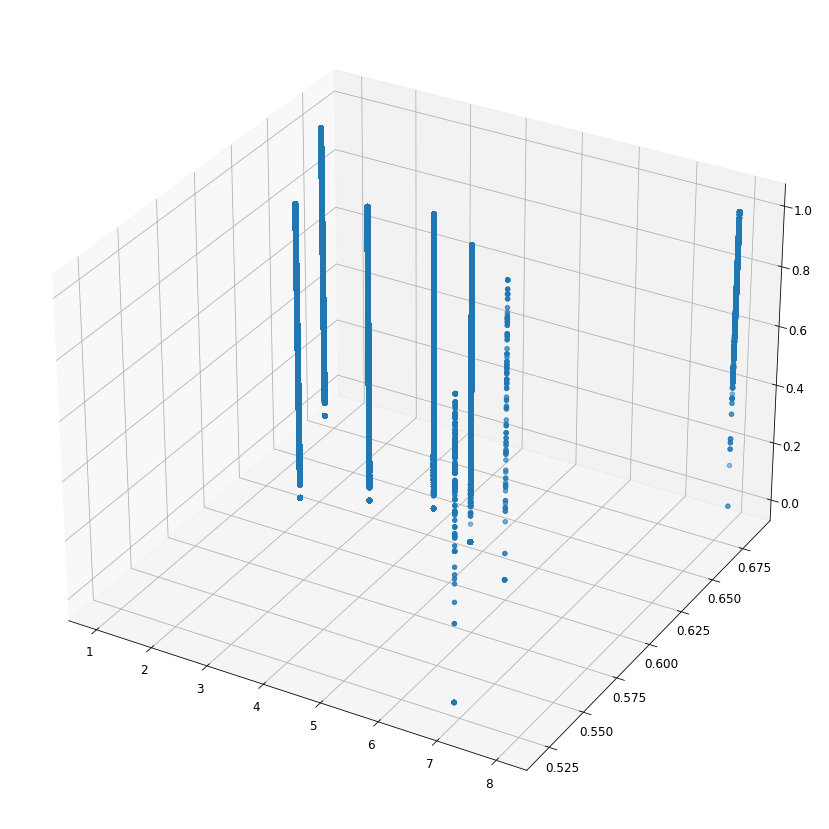

In [85]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(data["MathType"], data["MathDifficulty"], data["MathStdIQ"])

plt.show()

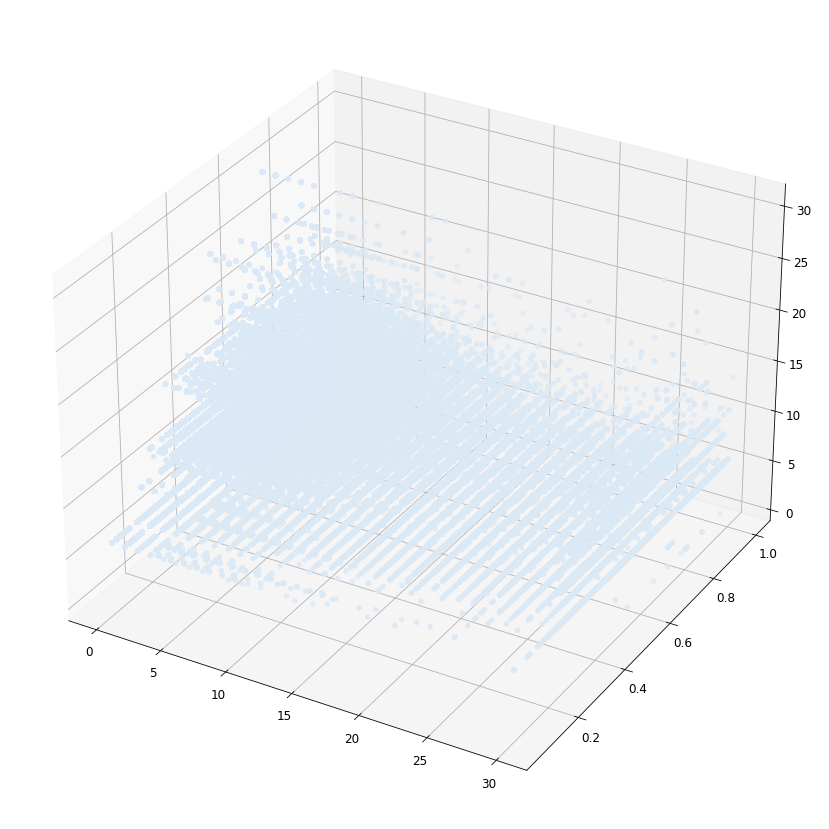

In [93]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(data["TimeToAnswerQuestion"], data["QuestionDifficulty"], data["QuestionLevel"])

plt.show()

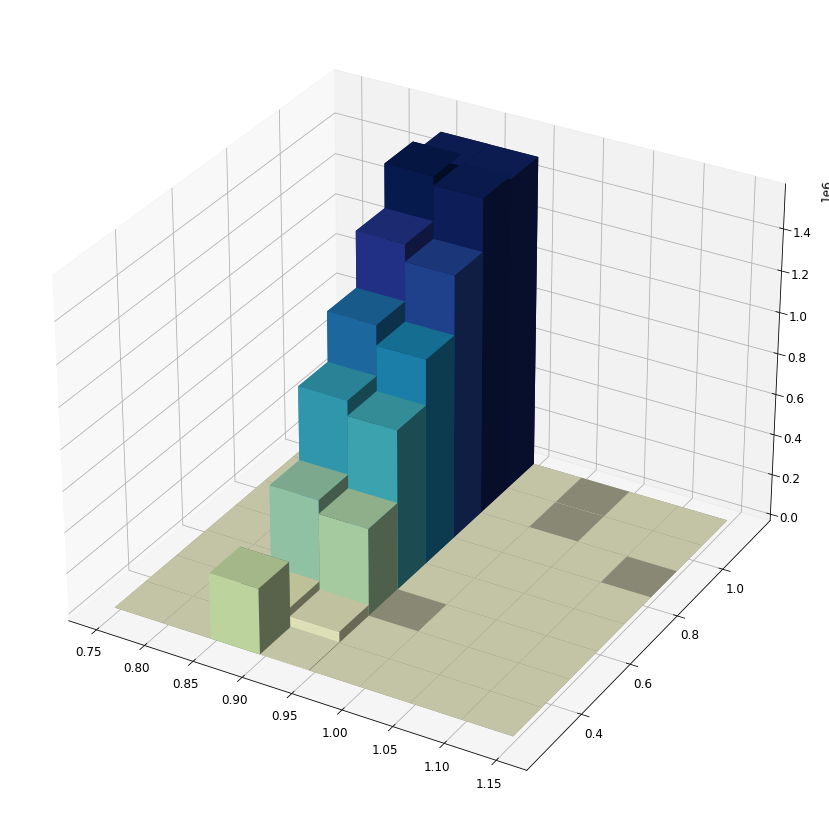

In [76]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(data["MathDifficulty"], data["MathStdIQ"], bins=8, range=[[0.5, 0.9], [0, 0.9]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('YlGnBu')
max_height = np.max(dz)
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz]

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.show()